In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [4]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [6]:
values.isnull().values.any()

False

In [7]:
labels.isnull().values.any()

False

In [8]:
values.dtypes 

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [9]:
values["building_id"].count() == values["building_id"].drop_duplicates().count()

True

In [10]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
to_be_categorized = ["land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for row in to_be_categorized:
    values[row] = values[row].astype("category")
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [12]:
datatypes = dict(values.dtypes)
for row in values.columns:
    if datatypes[row] != "int64" and datatypes[row] != "int32" and \
       datatypes[row] != "int16" and datatypes[row] != "int8":
        continue
    if values[row].nlargest(1).item() > 32767 and values[row].nlargest(1).item() < 2**31:
        values[row] = values[row].astype(np.int32)
    elif values[row].nlargest(1).item() > 127:
        values[row] = values[row].astype(np.int16)
    else:
        values[row] = values[row].astype(np.int8)
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [14]:
labels["building_id"] = labels["building_id"].astype(np.int32)
labels["damage_grade"] = labels["damage_grade"].astype(np.int8)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int32
 1   damage_grade  260601 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 1.2 MB


# Primer Modelo

In [15]:
important_values = values\
                .merge(labels, on="building_id")
important_values.drop(columns=["building_id"], inplace = True)
important_values["geo_level_1_id"] = important_values["geo_level_1_id"].astype("category")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(important_values.drop(columns = 'damage_grade'),
                                                    important_values['damage_grade'], test_size = 0.2, random_state = 123)

In [17]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ["geo_level_1_id", "land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for feature in features_to_encode:
    X_train = encode_and_bind(X_train, feature)

In [18]:
rf_model = RandomForestClassifier(n_estimators = 150, max_depth = 15, criterion = "gini", verbose=True)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   26.4s finished


RandomForestClassifier(max_depth=15, n_estimators=150, verbose=True)

In [19]:
rf_model.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.7s finished


0.7093534151957023

In [20]:
rf_model.feature_importances_

array([4.09037763e-02, 2.97252701e-02, 1.90878525e-02, 3.40026345e-02,
       2.57900181e-02, 1.91941364e-02, 6.10795051e-03, 3.72319996e-02,
       5.99761433e-03, 2.90949815e-03, 6.47904996e-03, 1.96861415e-02,
       8.80420221e-03, 4.64846495e-03, 6.13202383e-03, 1.03146840e-02,
       2.31950085e-03, 9.00940063e-03, 5.57975983e-03, 3.22076445e-03,
       3.17096804e-03, 1.19289451e-03, 2.43335009e-04, 1.16946666e-04,
       2.80676336e-04, 4.92775885e-05, 3.60181650e-05, 1.50495319e-05,
       8.17840423e-04, 3.15893275e-03, 2.61243318e-03, 1.16254629e-04,
       1.49520673e-03, 1.67479611e-02, 3.48700535e-03, 1.32543656e-02,
       3.82470776e-03, 2.63377423e-02, 2.36845584e-03, 5.04838169e-03,
       2.16192597e-03, 7.57001055e-04, 1.47766814e-02, 4.80425744e-04,
       3.61115734e-04, 1.72117792e-03, 2.04931026e-01, 1.78810611e-02,
       4.57568928e-05, 1.40168044e-02, 3.36403541e-02, 7.52457546e-03,
       6.91090591e-05, 8.97145359e-04, 7.14002663e-03, 4.04459209e-02,
      

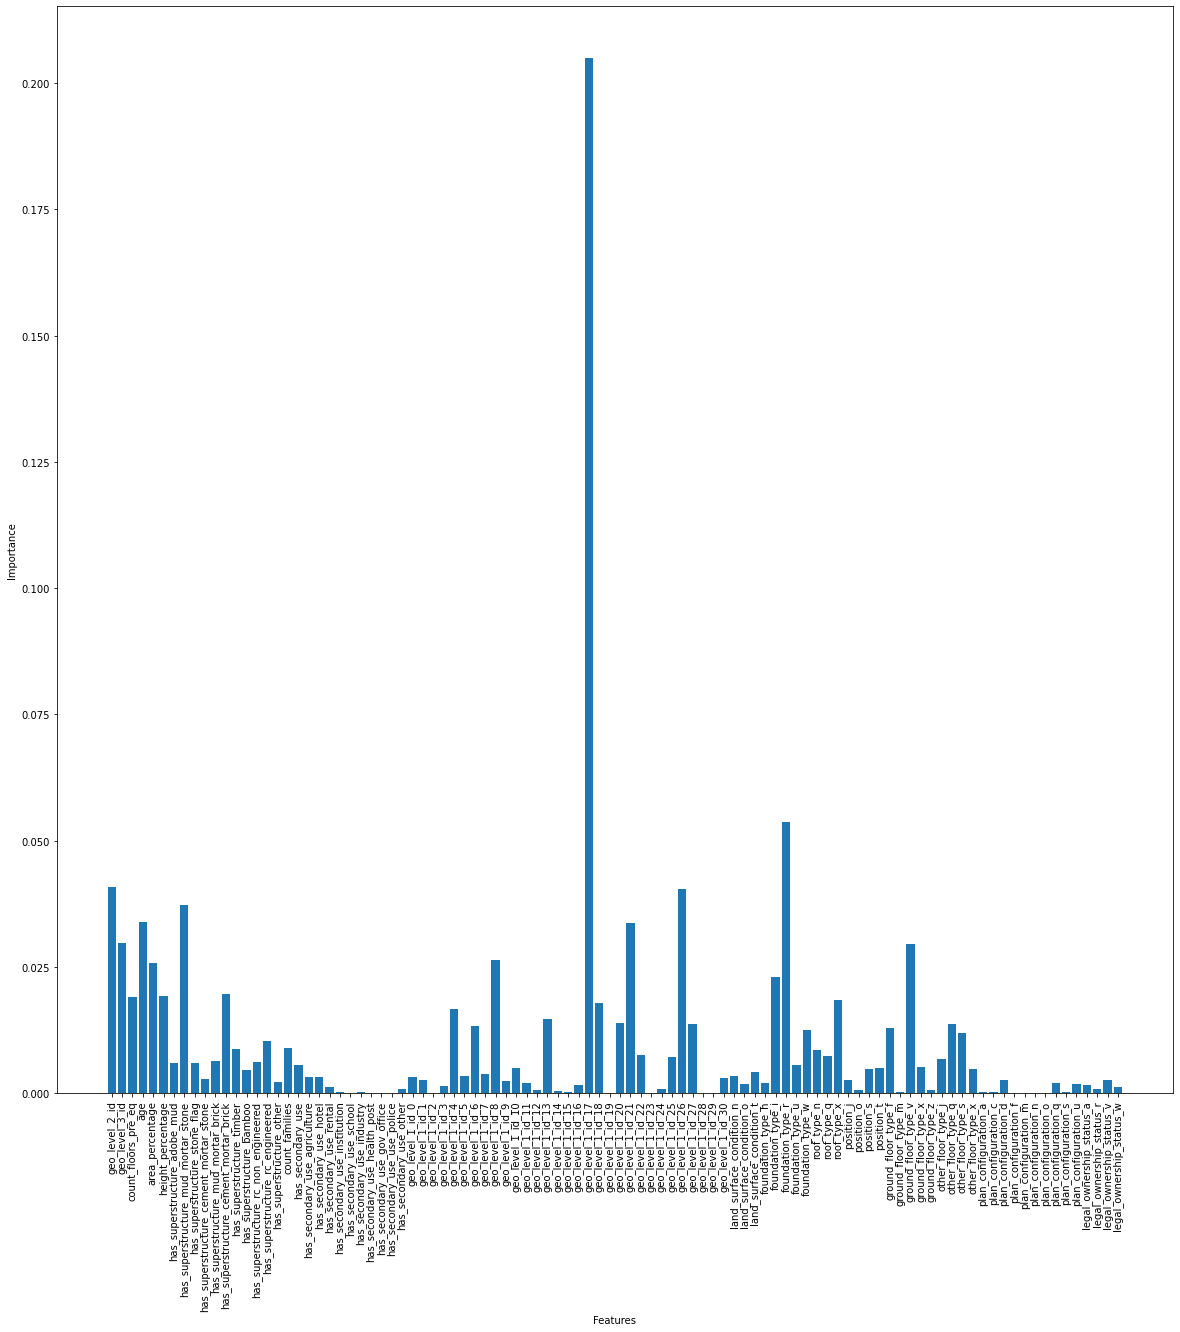

In [21]:
fig, ax = plt.subplots(figsize = (20,20))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Importance")
plt.show()

# Obtenemos un grafico que indica la importancia de cada columna para el modelo recien generado.

In [22]:
important_values = values\
                .merge(labels, on="building_id")
important_values.drop(columns=["building_id"], inplace = True)
important_values["geo_level_1_id"] = important_values["geo_level_1_id"].astype("category")
important_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260598,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,0,0,0,0,0,0,2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(important_values.drop(columns = 'damage_grade'),
                                                    important_values['damage_grade'], test_size = 0.2, random_state = 123)

In [24]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ["geo_level_1_id", "land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for feature in features_to_encode:
    X_train = encode_and_bind(X_train, feature)
    X_test = encode_and_bind(X_test, feature)

In [25]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, max_features = 45, criterion = "gini", verbose=True)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(max_depth=15, max_features=45, verbose=True)

In [26]:
rf_model.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


0.7519905986185725

In [27]:
y_preds = rf_model.predict(X_test)
f1_score(y_test, y_preds, average='micro')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.7108651023579746

In [28]:
rf_model.feature_importances_

array([9.57763488e-02, 5.74062407e-02, 1.05056711e-02, 4.18867055e-02,
       3.78901213e-02, 2.25684889e-02, 3.18499132e-03, 2.58790333e-02,
       5.57737743e-03, 2.19591627e-03, 4.33227951e-03, 1.08161802e-02,
       7.47069258e-03, 2.90633645e-03, 3.35575241e-03, 2.07253421e-03,
       2.59729401e-03, 1.12901029e-02, 5.56529523e-03, 3.17374895e-03,
       2.36578139e-03, 9.84392428e-04, 1.87038178e-04, 1.01092318e-04,
       3.12524465e-04, 5.21055094e-05, 3.34157875e-05, 8.49525223e-06,
       7.32254908e-04, 2.24024916e-04, 2.85242923e-04, 4.89721636e-05,
       5.30794757e-03, 4.35393894e-03, 6.12079502e-04, 8.17685952e-03,
       1.14125282e-02, 3.60271515e-02, 1.12336153e-03, 1.82896888e-02,
       8.43485595e-03, 3.08276377e-05, 6.74685624e-03, 4.32573370e-05,
       1.18838037e-04, 2.09458707e-04, 1.89824430e-01, 2.48443323e-02,
       3.66118713e-06, 3.09613937e-03, 4.24601901e-02, 8.78839084e-04,
       6.38074470e-05, 1.78278954e-04, 8.66228750e-04, 2.93443930e-02,
      

In [29]:
test_values = pd.read_csv('../csv/test_values.csv', index_col = "building_id")
test_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_values_subset = test_values
test_values_subset["geo_level_1_id"] = test_values_subset["geo_level_1_id"].astype("category")
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ["geo_level_1_id", "land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for feature in features_to_encode:
    test_values_subset = encode_and_bind(test_values_subset, feature)
test_values_subset

,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
300051,596,11307,3,20,7,6,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
99355,141,11987,2,25,13,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
890251,19,10044,2,5,4,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
745817,39,633,1,0,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
421793,289,7970,3,15,8,7,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,605,3623,3,70,20,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
663567,1407,11907,3,25,6,7,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1049160,1136,7712,1,50,3,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
preds = rf_model.predict(test_values_subset)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [33]:
submission_format = pd.read_csv('../csv/submission_format.csv', index_col = "building_id")

In [34]:
my_submission = pd.DataFrame(data=preds,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [35]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [36]:
my_submission.to_csv('../csv/predictions/jf-model-2-submission-all-params.csv')

In [37]:
!head ../csv/predictions/jf-model-2-submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2
